In [2]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)

In [3]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [4]:
num_inputs = 2
num_outputs = 1
num_examples = 10000
def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2
X = nd.random_normal(shape=(num_examples, num_inputs), ctx=data_ctx)
noise = .1 * nd.random_normal(shape=(num_examples,), ctx=data_ctx)
y = real_fn(X) + noise


In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1].asnumpy(),y.asnumpy())
plt.show()

<Figure size 640x480 with 1 Axes>

In [36]:
batch_size = 3
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                  batch_size=batch_size, shuffle=True)

In [37]:
for i, (data, label) in enumerate(train_data):
   print(data, label)
   break


[[-1.0361184  -0.32874164]
 [ 0.12282393  0.08968338]
 [-1.2742991   1.171567  ]]
<NDArray 3x2 @cpu(0)> 
[ 3.4617715  4.1061516 -2.2489038]
<NDArray 3 @cpu(0)>


In [38]:
for i, (data, label) in enumerate(train_data):
   print(data, label)
   break


[[ 0.6400578   0.85067165]
 [-0.11545629 -0.6701872 ]
 [ 0.2413527   0.6644538 ]]
<NDArray 3x2 @cpu(0)> 
[2.5808315 6.2687087 2.418439 ]
<NDArray 3 @cpu(0)>


In [39]:
#Model Parameters
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [40]:
# Actach Gradient
for param in params:
    param.attach_grad()

In [41]:
# Model Neural Network
def net(X):
    return mx.nd.dot(X, w) + b

In [42]:
# Loss Function
def square_loss(yhat, y):
    return nd.mean((yhat - y) ** 2)

In [43]:
#Optimizer
def SGD(params, lr):
   for param in params:
       param[:] = param - lr * param.grad

In [44]:
#Executing Training Loop
epochs = 10
learning_rate = .0001
num_batches = num_examples/batch_size

for e in range(epochs):
   cumulative_loss = 0
   # inner loop
   for i, (data, label) in enumerate(train_data):
       data = data.as_in_context(model_ctx)
       label = label.as_in_context(model_ctx).reshape((-1, 1))
       with autograd.record():
           output = net(data)
           loss = square_loss(output, label)
       loss.backward()
       SGD(params, learning_rate)
       cumulative_loss += loss.asscalar()
   print(cumulative_loss / num_batches)

23.649479344872013
6.1733606624292205
1.6170902406554901
0.4293879466503218
0.11953304158114478
0.03870125243903094
0.017618520080843744
0.012113852768553805
0.010681989267076641
0.01031062907560099


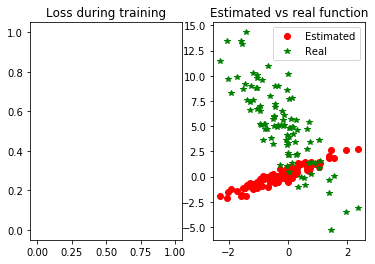

Epoch 0, batch 3333. Mean loss: 0.04669632659464878
Epoch 1, batch 3333. Mean loss: 0.011427024852453177
Epoch 2, batch 3333. Mean loss: 0.011535417428644359
Epoch 3, batch 3333. Mean loss: 0.01153655712521031
Epoch 4, batch 3333. Mean loss: 0.011517151155701686
Epoch 5, batch 3333. Mean loss: 0.011417278701475696
Epoch 6, batch 3333. Mean loss: 0.011522225653756322
Epoch 7, batch 3333. Mean loss: 0.011504341744413067
Epoch 8, batch 3333. Mean loss: 0.011482007621949742
Epoch 9, batch 3333. Mean loss: 0.01153218265379155


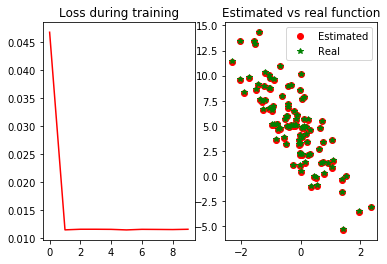

In [48]:
# Visualizing our training progress
############################################
#    Re-initialize parameters because they
#    were already trained in the first loop
############################################
w[:] = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b[:] = nd.random_normal(shape=num_outputs, ctx=model_ctx)

############################################
#    Script to plot the losses over time
############################################
def plot(losses, X, sample_size=100):
   xs = list(range(len(losses)))
   f, (fg1, fg2) = plt.subplots(1, 2)
   fg1.set_title('Loss during training')
   fg1.plot(xs, losses, '-r')
   fg2.set_title('Estimated vs real function')
   fg2.plot(X[:sample_size, 1].asnumpy(),
            net(X[:sample_size, :]).asnumpy(), 'or', label='Estimated')
   fg2.plot(X[:sample_size, 1].asnumpy(),
            real_fn(X[:sample_size, :]).asnumpy(), '*g', label='Real')
   fg2.legend()

   plt.show()

learning_rate = .1
losses = []
plot(losses, X)

for e in range(epochs):
   cumulative_loss = 0
   for i, (data, label) in enumerate(train_data):
       data = data.as_in_context(model_ctx)
       label = label.as_in_context(model_ctx).reshape((-1, 1))
       with autograd.record():
           output = net(data)
           loss = square_loss(output, label)
       loss.backward()
       SGD(params, learning_rate)
       cumulative_loss += loss.asscalar()

   print("Epoch %s, batch %s. Mean loss: %s" % (e, i, cumulative_loss/num_batches))
   losses.append(cumulative_loss/num_batches)

plot(losses, X)

In [15]:
w


[[ 1.99524  ]
 [-3.3936098]]
<NDArray 2x1 @cpu(0)>

In [16]:
b


[4.1967874]
<NDArray 1 @cpu(0)>